<a href="https://colab.research.google.com/github/janjira24122544/Python_dataviz2023/blob/main/%E0%B9%80%E0%B8%95%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%A1%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%97%E0%B8%B3_Dashbroad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# กลุ่ม วันนี้เรียนห้องไหน!?

## ลิงค์ Dashboard -> [lookerstudio](https://lookerstudio.google.com/reporting/76b50178-f669-4530-a2cd-1650c674d886)

##รายชื่อสมาชิก
1. นายจิรภัทร กาญจนวนา 633020368-1
2. นายจิรวัฒน์ ทวินันท์ 633020369-9
3. นางสาวสิรภัทร ไชยมาตย์ 643020523-6
4. นางสาวหทัยชนก สรวงชัยภูมิ 643020525-2
5. นางสาวจันจิรา สินธุวานิช 633020366-5
6. นางสาวฐาปนี ฟุ้งขจร 633020670-2




#นำข้อมูลเข้า

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
os.chdir('/content/gdrive/MyDrive/DataViz23Data')
!pwd #เช็ค path ที่กำลังทำงานอยู่

/content/gdrive/MyDrive/DataViz23Data


In [ ]:
!ls

 Bhumjaithai.png
 Compare.csv
 Compare.gsheet
 condo.csv
 DataBKK01.csv
 df_Candidate.csv
 df_Candidate.gsheet
 df_MP.csv
 df_MP.gsheet
 df_Partylist.csv
 df_Partylist.gsheet
 ectreport2023.xlsx
'ectreport66.xlsx - Candidate_Constituency.csv'
'ectreport66.xlsx - Candidate_PartyList.csv'
'ectreport66.xlsx - Candidate_PM.csv'
'ectreport66.xlsx - info_constituency.csv'
'ectreport66.xlsx - info_party_overview.csv'
'ectreport66.xlsx - info_province.csv'
'ectreport66.xlsx - result_constituencies_Candidate.csv'
'ectreport66.xlsx - result_constituencies_PartyList.csv'
'ectreport66.xlsx - result_constituencies_status.csv'
'ectreport66.xlsx - Schema.csv'
 MFP_Point.csv
 MFP_Point.gsheet
'Move Forward Party.png'
 oct65.xlsx
 opendata_project-2.csv
 opendata_unittype-2.csv
 Partylist_merge.csv
 Partylist_merge.gsheet
 Pheu_Thai_RM_bk.png
 sep65.xlsx
 table_merge_result.csv
 table_merge_result.gsheet
 table_merge_result.xlsx
 thailand-elections-removebg-rmBK.png


In [ ]:
file_name = 'ectreport2023.xlsx'
dfs = pd.ExcelFile(file_name) # คำสั่งอ่านไฟล์ xlsx
dfs.sheet_names # คำสั่งเช็คไฟล์ xlsx มี sheet ย่อยในไฟล์อะไรบ้าง

['Schema',
 'result_constituencies_PartyList',
 'result_constituencies_Candidate',
 'result_constituencies_status',
 'info_province',
 'info_party_overview',
 'info_constituency',
 'Candidate_Constituency',
 'Candidate_PartyList',
 'Candidate_PM']

In [ ]:
# select sheet page by sheet name
Schema = dfs.parse('Schema')
result_constituencies_PartyList = dfs.parse('result_constituencies_PartyList')
result_constituencies_Candidate = dfs.parse('result_constituencies_Candidate')
result_constituencies_status = dfs.parse('result_constituencies_status')
info_province = dfs.parse('info_province')
info_party_overview = dfs.parse('info_party_overview')
info_constituency = dfs.parse('info_constituency')
Candidate_constituency = dfs.parse('Candidate_Constituency')
Candidate_partyList = dfs.parse('Candidate_PartyList')
Candidate_pm = dfs.parse('Candidate_PM')

In [ ]:
Schema.head()

,Sheet,Column,Data Type,Description,Example
0,Candidate_Constituency,mp_app_id,string,รหัสผู้สมัคร ส.ส. เขต,BKK_1_1
1,Candidate_Constituency,mp_app_no,number,หมายเลขผู้สมัคร ส.ส. เขต,1
2,Candidate_Constituency,mp_app_party_id,string,สังกัดพรรคตามรหัสพรรคการเมือง,701
3,Candidate_Constituency,mp_app_name,string,ชื่อผู้สมัคร,นายทดสอบ สามารถ
4,Candidate_Constituency,image_url,string,ลิงก์รูปภาพผู้สมัคร,https://ectdatastorage.blob.core.windows.net/d...


#เช็คค่าว่าง

In [ ]:
# เช็คค่าว่าง Null
print(result_constituencies_PartyList.isnull().any())
print(result_constituencies_Candidate.isnull().any())
print(result_constituencies_status.isnull().any())
print(info_province.isnull().any())
print(info_party_overview.isnull().any())
print(info_constituency.isnull().any())
print(Candidate_constituency.isnull().any())
print(Candidate_partyList.isnull().any())
print(Candidate_pm.isnull().any())
#มีค่าว่างใน info_party_overview และ info_constituency

cons_id                    False
party_id                   False
party_list_vote            False
party_list_vote_percent    False
dtype: bool
cons_id                False
mp_app_id              False
mp_app_rank            False
mp_app_vote            False
mp_app_vote_percent    False
party_id               False
dtype: bool
prov_id                  False
cons_id                  False
turn_out                 False
percent_turn_out         False
counted_vote_stations    False
percent_count            False
pause_report             False
dtype: bool
province_id              False
prov_id                  False
province                 False
eng                      False
abbre_thai               False
total_registered_vote    False
total_vote_stations      False
dtype: bool
id          False
party_no     True
name        False
abbr        False
color       False
logo_url    False
dtype: bool
cons_id                False
cons_no                False
prov_id                False
regis

In [ ]:
info_party_overview[info_party_overview['party_no'].isnull()] #แสดง row ที่มี party_no ว่าง
#ประชาสามัคคี	= 99
#พลังบูรพา	= 99
#รักษ์ธรรม	= 99

,id,party_no,name,abbr,color,logo_url
9,711,NaN,ประชาสามัคคี,ปส.,#ecb55e,https://cdn.ectreport.com/images/logos/ประชาสา...
11,713,NaN,พลังบูรพา,พบ.,#4696d6,https://cdn.ectreport.com/images/logos/พลังบูร...
17,720,NaN,รักษ์ธรรม,ร.ธ.,#dbdc9c,https://cdn.ectreport.com/images/logos/รักษ์ธร...


[เลือกตั้ง 2566 : เช็กเบอร์ "พรรคการเมือง 2566" แบบบัญชีรายชื่อ](https://https://www.pptvhd36.com/news/การเมือง/193829)

In [ ]:
#แทนค่าว่างด้วยเลข 99
info_party_overview['party_no'] = info_party_overview['party_no'].fillna(99)

In [ ]:
info_constituency[info_constituency['zone'].isnull()] #แสดง row ที่มี party_no ว่าง
#RNG - ระนอง // มีเขตเดียว อ.เมืองระนอง
#SBR - สิงห์บุรี //
#SKM - สมุทรสงคราม
#TRT - ตราด

,cons_id,cons_no,prov_id,registered_vote,total_vote_stations,zone
804,RNG_1,1,RNG,140024,209,NaN
817,SBR_1,1,SBR,168055,213,NaN
839,SKM_1,1,SKM,156558,257,NaN
1037,TRT_1,1,TRT,175112,314,NaN


[RNG - ระนอง](https://www.itax.in.th/media/%E0%B9%80%E0%B8%82%E0%B8%95%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%81%E0%B8%95%E0%B8%B1%E0%B9%89%E0%B8%87-2566-%E0%B8%A3%E0%B8%B0%E0%B8%99%E0%B8%AD%E0%B8%87/)
  
[SBR - สิงห์บุรี](https://www.itax.in.th/media/%E0%B9%80%E0%B8%82%E0%B8%95%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%81%E0%B8%95%E0%B8%B1%E0%B9%89%E0%B8%87-2566-%E0%B8%AA%E0%B8%B4%E0%B8%87%E0%B8%AB%E0%B9%8C%E0%B8%9A%E0%B8%B8%E0%B8%A3%E0%B8%B5/)

[SKM - สมุทรสงคราม](https://www.itax.in.th/media/%E0%B9%80%E0%B8%82%E0%B8%95%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%81%E0%B8%95%E0%B8%B1%E0%B9%89%E0%B8%87-2566-%E0%B8%AA%E0%B8%A1%E0%B8%B8%E0%B8%97%E0%B8%A3%E0%B8%AA%E0%B8%87%E0%B8%84%E0%B8%A3/)

[TRT - ตราด](https://www.itax.in.th/media/%E0%B9%80%E0%B8%82%E0%B8%95%E0%B9%80%E0%B8%A5%E0%B8%B7%E0%B8%AD%E0%B8%81%E0%B8%95%E0%B8%B1%E0%B9%89%E0%B8%87-2566-%E0%B8%95%E0%B8%A3%E0%B8%B2%E0%B8%94/)



In [ ]:
# แทนค่าว่าง
info_constituency['zone'] = np.where(info_constituency['prov_id'] == 'RNG', 'อำเภอเมืองระนอง', info_constituency['zone'])
info_constituency['zone'] = np.where(info_constituency['prov_id'] == 'SBR', 'อำเภอเมืองสิงห์บุรี', info_constituency['zone'])
info_constituency['zone'] = np.where(info_constituency['prov_id'] == 'SKM', 'อำเภอเมืองสมุทรสงคราม', info_constituency['zone'])
info_constituency['zone'] = np.where(info_constituency['prov_id'] == 'TRT', 'อำเภอเมืองตราด', info_constituency['zone'])

#รวมตารางเพื่อนำไปทำ Dashbroad
* แต่ละภาคมีเปอร์เซ็นต์คะแนนส.ส.บัญชีรายชื่อเลือกในแต่ละพรรคเท่าไหร่บ้าง

* เปรียบเทียบคะแนน ส.ส. เขตกับ ส.ส. บัญชีรายชื่อ

* คะแนนส.ส เขตของพรรคที่ได้อันดับที่ 2  ที่ได้คะแนนใกล้เคียงกับคะแนน ส.ส เขตของพรรคที่ได้อันดับที่ 1 ไม่เกิน 5%

##แต่ละภาคมีเปอร์เซ็นต์คะแนนส.ส.บัญชีรายชื่อเลือก(ในพรรค 5 พรรคใหญ่)เท่าไหร่บ้าง

เพิ่มภูมิภาค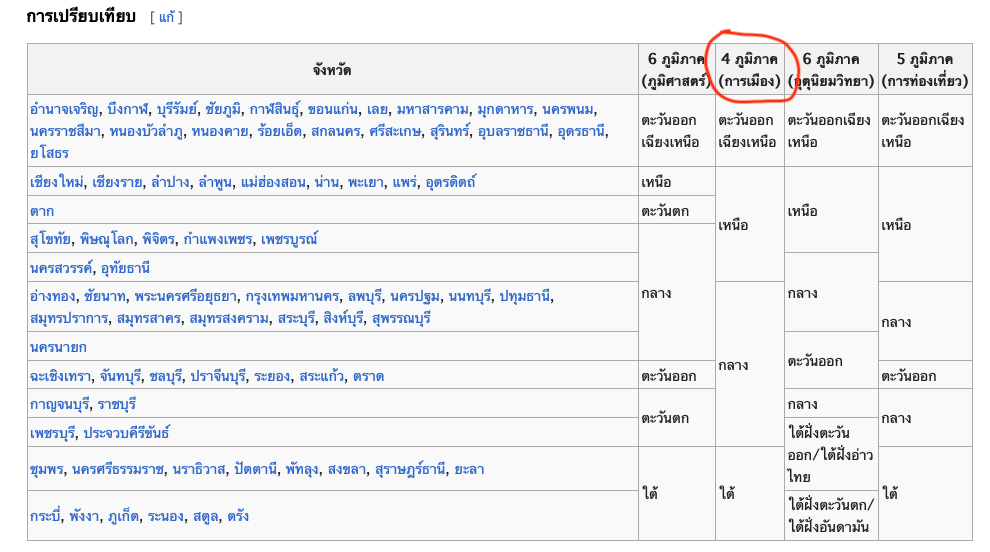

* นำ ```result_constituencies_PartyLis``` เชื่อมตารางกับ```info_constituency``` ด้วย ```cons_id``` เพื่อที่จะเอา ```prov_id``` ไประบุจังหวัดจากตาราง ```info_province```
* นำตารางที่ได้ต่อกับ ```info_party_overview``` โดยจะระบุชื่อพรรค
* นำ data frame ที่ระบุภูมิภาคมาเชื่อมกับตาราง

In [ ]:
result_constituencies_PartyList

,cons_id,party_id,party_list_vote,party_list_vote_percent
0,ACR_1,701,4550,4.30977
1,ACR_1,702,185,0.17523
2,ACR_1,703,67,0.06346
3,ACR_1,705,33576,31.80328
4,ACR_1,706,132,0.12503
...,...,...,...,...
26795,YST_3,780,145,0.13871
26796,YST_3,781,412,0.39414
26797,YST_3,783,17,0.01626
26798,YST_3,784,138,0.13202


In [ ]:
info_constituency = info_constituency.drop_duplicates(subset='cons_id')

In [ ]:
info_constituency

,cons_id,cons_no,prov_id,registered_vote,total_vote_stations,zone
0,ACR_1,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ
2,ACR_2,2,ACR,155938,331,อำเภอเสนางคนิคม
7,ATG_1,1,ATG,111917,239,อำเภอเมืองอ่างทอง
10,ATG_2,2,ATG,112739,253,อำเภอแสวงหา
15,AYA_1,1,AYA,138666,226,อำเภอบางบาล
...,...,...,...,...,...,...
1116,YLA_2,2,YLA,129255,192,"อำเภอเมืองยะลา (เฉพาะตำบลบุดี, ตำบลเปาะเส้ง, ต..."
1120,YLA_3,3,YLA,127447,217,อำเภอเบตง
1124,YST_1,1,YST,144909,300,อำเภอเมืองยโสธร
1128,YST_2,2,YST,141903,302,"อำเภอไทยเจริญ (เฉพาะตำบลน้ำคำ, ตำบลคำไผ่)"


In [ ]:
Partylist = result_constituencies_PartyList.merge(info_constituency, how ='left', left_on='cons_id',right_on='cons_id')
print(Partylist.shape)
Partylist

(26800, 9)


,cons_id,party_id,party_list_vote,party_list_vote_percent,cons_no,prov_id,registered_vote,total_vote_stations,zone
0,ACR_1,701,4550,4.30977,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ
1,ACR_1,702,185,0.17523,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ
2,ACR_1,703,67,0.06346,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ
3,ACR_1,705,33576,31.80328,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ
4,ACR_1,706,132,0.12503,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ
...,...,...,...,...,...,...,...,...,...
26795,YST_3,780,145,0.13871,3,YST,146060,303,อำเภอเลิงนกทา
26796,YST_3,781,412,0.39414,3,YST,146060,303,อำเภอเลิงนกทา
26797,YST_3,783,17,0.01626,3,YST,146060,303,อำเภอเลิงนกทา
26798,YST_3,784,138,0.13202,3,YST,146060,303,อำเภอเลิงนกทา


In [ ]:
Partylist2 = Partylist.merge(info_party_overview, how ='left', left_on='party_id',right_on='id')
print(Partylist2.shape)
Partylist2

(26800, 15)


,cons_id,party_id,party_list_vote,party_list_vote_percent,cons_no,prov_id,registered_vote,total_vote_stations,zone,id,party_no,name,abbr,color,logo_url
0,ACR_1,701,4550,4.30977,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,701,26.0,ประชาธิปัตย์,ปชป.,#06aff3,https://cdn.ectreport.com/images/logos/ประชาธิ...
1,ACR_1,702,185,0.17523,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,702,63.0,ประชากรไทย,ปชท.,#0f41ce,https://cdn.ectreport.com/images/logos/ประชากร...
2,ACR_1,703,67,0.06346,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,703,60.0,ความหวังใหม่,ควม.,#e6b750,https://cdn.ectreport.com/images/logos/ความหวั...
3,ACR_1,705,33576,31.80328,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...
4,ACR_1,706,132,0.12503,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,706,14.0,ชาติพัฒนากล้า,ชพก.,#233e8a,https://cdn.ectreport.com/images/logos/ชาติพัฒ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,YST_3,780,145,0.13871,3,YST,146060,303,อำเภอเลิงนกทา,780,55.0,ไทยก้าวหน้า,ทกน.,#b9bee3,https://cdn.ectreport.com/images/logos/ไทยก้าว...
26796,YST_3,781,412,0.39414,3,YST,146060,303,อำเภอเลิงนกทา,781,9.0,พลัง,พ.,#8e8fc7,https://cdn.ectreport.com/images/logos/พลัง.png
26797,YST_3,783,17,0.01626,3,YST,146060,303,อำเภอเลิงนกทา,783,52.0,ชาติรุ่งเรือง,ชรร.,#9cb4c9,https://cdn.ectreport.com/images/logos/ชาติรุ่...
26798,YST_3,784,138,0.13202,3,YST,146060,303,อำเภอเลิงนกทา,784,23.0,รวมใจไทย,ร.จ.ท.,#eec49a,https://cdn.ectreport.com/images/logos/รวมใจไท...


In [ ]:
Partylist3 = Partylist2.merge(info_province, how ='left', left_on='prov_id',right_on='prov_id')
print(Partylist3.shape)
Partylist3

(26800, 21)


,cons_id,party_id,party_list_vote,party_list_vote_percent,cons_no,prov_id,registered_vote,total_vote_stations_x,zone,id,...,name,abbr,color,logo_url,province_id,province,eng,abbre_thai,total_registered_vote,total_vote_stations_y
0,ACR_1,701,4550,4.30977,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,701,...,ประชาธิปัตย์,ปชป.,#06aff3,https://cdn.ectreport.com/images/logos/ประชาธิ...,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
1,ACR_1,702,185,0.17523,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,702,...,ประชากรไทย,ปชท.,#0f41ce,https://cdn.ectreport.com/images/logos/ประชากร...,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
2,ACR_1,703,67,0.06346,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,703,...,ความหวังใหม่,ควม.,#e6b750,https://cdn.ectreport.com/images/logos/ความหวั...,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
3,ACR_1,705,33576,31.80328,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,705,...,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
4,ACR_1,706,132,0.12503,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,706,...,ชาติพัฒนากล้า,ชพก.,#233e8a,https://cdn.ectreport.com/images/logos/ชาติพัฒ...,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,YST_3,780,145,0.13871,3,YST,146060,303,อำเภอเลิงนกทา,780,...,ไทยก้าวหน้า,ทกน.,#b9bee3,https://cdn.ectreport.com/images/logos/ไทยก้าว...,35,ยโสธร,YASOTHON,ยส,432872,905
26796,YST_3,781,412,0.39414,3,YST,146060,303,อำเภอเลิงนกทา,781,...,พลัง,พ.,#8e8fc7,https://cdn.ectreport.com/images/logos/พลัง.png,35,ยโสธร,YASOTHON,ยส,432872,905
26797,YST_3,783,17,0.01626,3,YST,146060,303,อำเภอเลิงนกทา,783,...,ชาติรุ่งเรือง,ชรร.,#9cb4c9,https://cdn.ectreport.com/images/logos/ชาติรุ่...,35,ยโสธร,YASOTHON,ยส,432872,905
26798,YST_3,784,138,0.13202,3,YST,146060,303,อำเภอเลิงนกทา,784,...,รวมใจไทย,ร.จ.ท.,#eec49a,https://cdn.ectreport.com/images/logos/รวมใจไท...,35,ยโสธร,YASOTHON,ยส,432872,905


In [ ]:
part_thai  = {'province': ['อำนาจเจริญ', 'บึงกาฬ', 'บุรีรัมย์', 'ชัยภูมิ', 'กาฬสินธุ์','ขอนแก่น', 'เลย', 'มหาสารคาม', 'มุกดาหาร', 'นครพนม', 'นครราชสีมา', 'หนองบัวลำภู', 'หนองคาย', 'ร้อยเอ็ด', 'สกลนคร', 'ศรีสะเกษ', 'สุรินทร์', 'อุบลราชธานี', 'อุดรธานี', 'ยโสธร','เชียงใหม่', 'เชียงราย', 'ลำปาง', 'ลำพูน', 'แม่ฮ่องสอน', 'น่าน', 'พะเยา', 'แพร่', 'อุตรดิตถ์','ตาก','สุโขทัย', 'พิษณุโลก', 'พิจิตร', 'กำแพงเพชร', 'เพชรบูรณ์','นครสวรรค์', 'อุทัยธานี'
,'อ่างทอง', 'ชัยนาท', 'พระนครศรีอยุธยา', 'กรุงเทพมหานคร','ลพบุรี', 'นครปฐม', 'นนทบุรี', 'ปทุมธานี', 'สมุทรปราการ', 'สมุทรสาคร', 'สมุทรสงคราม', 'สระบุรี', 'สิงห์บุรี', 'สุพรรณบุรี','นครนายก','ฉะเชิงเทรา', 'จันทบุรี', 'ชลบุรี', 'ปราจีนบุรี', 'ระยอง', 'สระแก้ว', 'ตราด','กาญจนบุรี', 'ราชบุรี','เพชรบุรี', 'ประจวบคีรีขันธ์'
,'ชุมพร', 'นครศรีธรรมราช', 'นราธิวาส', 'ปัตตานี', 'พัทลุง', 'สงขลา', 'สุราษฎร์ธานี', 'ยะลา','กระบี่', 'พังงา', 'ภูเก็ต', 'ระนอง', 'สตูล', 'ตรัง'],
        'part': ['ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคตะวันออกเฉียงเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ','ภาคเหนือ'
        ,'ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคกลาง','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้','ภาคใต้']}


In [ ]:
part_thai = pd.DataFrame(part_thai)
part_thai

,province,part
0,อำนาจเจริญ,ภาคตะวันออกเฉียงเหนือ
1,บึงกาฬ,ภาคตะวันออกเฉียงเหนือ
2,บุรีรัมย์,ภาคตะวันออกเฉียงเหนือ
3,ชัยภูมิ,ภาคตะวันออกเฉียงเหนือ
4,กาฬสินธุ์,ภาคตะวันออกเฉียงเหนือ
...,...,...
72,พังงา,ภาคใต้
73,ภูเก็ต,ภาคใต้
74,ระนอง,ภาคใต้
75,สตูล,ภาคใต้


In [ ]:
Partylist4 = Partylist3.merge(part_thai, how ='left', left_on='province',right_on='province')
print(Partylist4.shape)
Partylist4

(26800, 22)


,cons_id,party_id,party_list_vote,party_list_vote_percent,cons_no,prov_id,registered_vote,total_vote_stations_x,zone,id,...,abbr,color,logo_url,province_id,province,eng,abbre_thai,total_registered_vote,total_vote_stations_y,part
0,ACR_1,701,4550,4.30977,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,701,...,ปชป.,#06aff3,https://cdn.ectreport.com/images/logos/ประชาธิ...,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641,ภาคตะวันออกเฉียงเหนือ
1,ACR_1,702,185,0.17523,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,702,...,ปชท.,#0f41ce,https://cdn.ectreport.com/images/logos/ประชากร...,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641,ภาคตะวันออกเฉียงเหนือ
2,ACR_1,703,67,0.06346,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,703,...,ควม.,#e6b750,https://cdn.ectreport.com/images/logos/ความหวั...,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641,ภาคตะวันออกเฉียงเหนือ
3,ACR_1,705,33576,31.80328,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,705,...,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641,ภาคตะวันออกเฉียงเหนือ
4,ACR_1,706,132,0.12503,1,ACR,145416,310,อำเภอเมืองอำนาจเจริญ,706,...,ชพก.,#233e8a,https://cdn.ectreport.com/images/logos/ชาติพัฒ...,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641,ภาคตะวันออกเฉียงเหนือ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,YST_3,780,145,0.13871,3,YST,146060,303,อำเภอเลิงนกทา,780,...,ทกน.,#b9bee3,https://cdn.ectreport.com/images/logos/ไทยก้าว...,35,ยโสธร,YASOTHON,ยส,432872,905,ภาคตะวันออกเฉียงเหนือ
26796,YST_3,781,412,0.39414,3,YST,146060,303,อำเภอเลิงนกทา,781,...,พ.,#8e8fc7,https://cdn.ectreport.com/images/logos/พลัง.png,35,ยโสธร,YASOTHON,ยส,432872,905,ภาคตะวันออกเฉียงเหนือ
26797,YST_3,783,17,0.01626,3,YST,146060,303,อำเภอเลิงนกทา,783,...,ชรร.,#9cb4c9,https://cdn.ectreport.com/images/logos/ชาติรุ่...,35,ยโสธร,YASOTHON,ยส,432872,905,ภาคตะวันออกเฉียงเหนือ
26798,YST_3,784,138,0.13202,3,YST,146060,303,อำเภอเลิงนกทา,784,...,ร.จ.ท.,#eec49a,https://cdn.ectreport.com/images/logos/รวมใจไท...,35,ยโสธร,YASOTHON,ยส,432872,905,ภาคตะวันออกเฉียงเหนือ


In [ ]:
Partylist4.to_csv('Partylist_merge.csv', index=False)

##เปรียบเทียบคะแนน ส.ส. เขตกับ ส.ส. บัญชีรายชื่อ ในพรรค 5 พรรคใหญ่

* นำตาราง ```result_constituencies_Candidate``` มาหาผลรวมคะแนนส.ส.แบบแบ่งเขตของทุกพรรค
* นำตาราง ```result_constituencies_PartyList``` มาหาผลรวมคะแนนส.ส.แบบบัญชีรายชื่อของทุกพรรค
* นำตารางทั้ง 2 มารวมกันด้วย ```party_id```
* นำ ```info_party_overview``` มารวมกับตารางด้วย ```party_id``` เพื่อที่จะระบุชื่อพรรค








In [ ]:
result_Candidate = result_constituencies_Candidate.groupby('party_id').sum().reset_index()
result_Candidate

<ipython-input-104-4e670e7f16a8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_Candidate = result_constituencies_Candidate.groupby('party_id').sum().reset_index()


,party_id,mp_app_rank,mp_app_vote,mp_app_vote_percent
0,701,2285,2231142,2411.97409
1,702,411,4058,3.95686
2,703,59,1195,1.25961
3,705,1064,9222908,9600.96936
4,706,757,297294,342.85041
...,...,...,...,...
65,780,48,1556,1.58187
66,781,48,2807,2.68777
67,783,41,431,0.54416
68,784,29,427,0.43129


In [ ]:
result_Candidate.drop(['mp_app_rank','mp_app_vote_percent'], axis=1,inplace=True)
result_Candidate

,party_id,mp_app_vote
0,701,2231142
1,702,4058
2,703,1195
3,705,9222908
4,706,297294
...,...,...
65,780,1556
66,781,2807
67,783,431
68,784,427


In [ ]:
result_PartyList = result_constituencies_PartyList.groupby('party_id').sum().reset_index()
result_PartyList

<ipython-input-106-9466c24a8f15>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_PartyList = result_constituencies_PartyList.groupby('party_id').sum().reset_index()


,party_id,party_list_vote,party_list_vote_percent
0,701,899303,1005.55881
1,702,56655,59.65858
2,703,10687,11.45069
3,705,10865836,11341.43644
4,706,207860,241.37173
...,...,...,...
62,780,34559,36.85553
63,781,154602,183.59689
64,783,4497,4.77713
65,784,71765,76.89897


In [ ]:
result_PartyList.drop('party_list_vote_percent', axis=1,inplace=True)
result_PartyList

,party_id,party_list_vote
0,701,899303
1,702,56655
2,703,10687
3,705,10865836
4,706,207860
...,...,...
62,780,34559
63,781,154602
64,783,4497
65,784,71765


In [ ]:
result = result_Candidate.merge(result_PartyList, how ='left', left_on='party_id',right_on='party_id')
print(result.shape)
result

(70, 3)


,party_id,mp_app_vote,party_list_vote
0,701,2231142,899303.0
1,702,4058,56655.0
2,703,1195,10687.0
3,705,9222908,10865836.0
4,706,297294,207860.0
...,...,...,...
65,780,1556,34559.0
66,781,2807,154602.0
67,783,431,4497.0
68,784,427,71765.0


In [ ]:
result1 = result.merge(info_party_overview, how ='left', left_on='party_id',right_on='id')
print(result1.shape)
result1

(70, 9)


,party_id,mp_app_vote,party_list_vote,id,party_no,name,abbr,color,logo_url
0,701,2231142,899303.0,701,26.0,ประชาธิปัตย์,ปชป.,#06aff3,https://cdn.ectreport.com/images/logos/ประชาธิ...
1,702,4058,56655.0,702,63.0,ประชากรไทย,ปชท.,#0f41ce,https://cdn.ectreport.com/images/logos/ประชากร...
2,703,1195,10687.0,703,60.0,ความหวังใหม่,ควม.,#e6b750,https://cdn.ectreport.com/images/logos/ความหวั...
3,705,9222908,10865836.0,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...
4,706,297294,207860.0,706,14.0,ชาติพัฒนากล้า,ชพก.,#233e8a,https://cdn.ectreport.com/images/logos/ชาติพัฒ...
...,...,...,...,...,...,...,...,...,...
65,780,1556,34559.0,780,55.0,ไทยก้าวหน้า,ทกน.,#b9bee3,https://cdn.ectreport.com/images/logos/ไทยก้าว...
66,781,2807,154602.0,781,9.0,พลัง,พ.,#8e8fc7,https://cdn.ectreport.com/images/logos/พลัง.png
67,783,431,4497.0,783,52.0,ชาติรุ่งเรือง,ชรร.,#9cb4c9,https://cdn.ectreport.com/images/logos/ชาติรุ่...
68,784,427,71765.0,784,23.0,รวมใจไทย,ร.จ.ท.,#eec49a,https://cdn.ectreport.com/images/logos/รวมใจไท...


In [ ]:
result1.iloc[23] #พรรคก้าวไกล

party_id                                                         726
mp_app_vote                                                  9535709
party_list_vote                                           14233895.0
id                                                               726
party_no                                                        31.0
name                                                         ก้าวไกล
abbr                                                            ก.ก.
color                                                        #f47526
logo_url           https://cdn.ectreport.com/images/logos/ก้าวไกล...
Name: 23, dtype: object

In [ ]:
# เช็คค่าว่าง
print(result1.isnull().any())

party_id           False
mp_app_vote        False
party_list_vote     True
id                 False
party_no           False
name               False
abbr               False
color              False
logo_url           False
dtype: bool


In [ ]:
result1[result1['party_list_vote'].isnull()] #แสดง row ที่มีค่าว่าง

,party_id,mp_app_vote,party_list_vote,id,party_no,name,abbr,color,logo_url
9,711,65,NaN,711,99.0,ประชาสามัคคี,ปส.,#ecb55e,https://cdn.ectreport.com/images/logos/ประชาสา...
11,713,889,NaN,713,99.0,พลังบูรพา,พบ.,#4696d6,https://cdn.ectreport.com/images/logos/พลังบูร...
17,720,232,NaN,720,99.0,รักษ์ธรรม,ร.ธ.,#dbdc9c,https://cdn.ectreport.com/images/logos/รักษ์ธร...


In [ ]:
#แทนค่าว่างด้วยเลข 0 เนื่องจากพรรคที่มีคะแนนเสียงเป็นค่าว่างหมายถึงไม่มีคะแนนเสียงสส.บัญชีรายชื่อเลย
result1['party_list_vote'] = result1['party_list_vote'].fillna(0)
print(result1.isnull().any())

party_id           False
mp_app_vote        False
party_list_vote    False
id                 False
party_no           False
name               False
abbr               False
color              False
logo_url           False
dtype: bool


In [ ]:
result1

,party_id,mp_app_vote,party_list_vote,id,party_no,name,abbr,color,logo_url
0,701,2231142,899303.0,701,26.0,ประชาธิปัตย์,ปชป.,#06aff3,https://cdn.ectreport.com/images/logos/ประชาธิ...
1,702,4058,56655.0,702,63.0,ประชากรไทย,ปชท.,#0f41ce,https://cdn.ectreport.com/images/logos/ประชากร...
2,703,1195,10687.0,703,60.0,ความหวังใหม่,ควม.,#e6b750,https://cdn.ectreport.com/images/logos/ความหวั...
3,705,9222908,10865836.0,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...
4,706,297294,207860.0,706,14.0,ชาติพัฒนากล้า,ชพก.,#233e8a,https://cdn.ectreport.com/images/logos/ชาติพัฒ...
...,...,...,...,...,...,...,...,...,...
65,780,1556,34559.0,780,55.0,ไทยก้าวหน้า,ทกน.,#b9bee3,https://cdn.ectreport.com/images/logos/ไทยก้าว...
66,781,2807,154602.0,781,9.0,พลัง,พ.,#8e8fc7,https://cdn.ectreport.com/images/logos/พลัง.png
67,783,431,4497.0,783,52.0,ชาติรุ่งเรือง,ชรร.,#9cb4c9,https://cdn.ectreport.com/images/logos/ชาติรุ่...
68,784,427,71765.0,784,23.0,รวมใจไทย,ร.จ.ท.,#eec49a,https://cdn.ectreport.com/images/logos/รวมใจไท...


In [ ]:
result1.to_csv('Compare.csv', index=False)

##คะแนนส.ส เขตของพรรคที่ได้อันดับที่ 2  ใกล้เคียงกับคะแนน ส.ส เขตของพรรคที่ได้อันดับที่ 1 ไม่เกิน 5%

* ใส่เขตการเลือกตั้งโดยดูจาก `cons_id` เช่น `ACR_1 จะหมายถึง จังหวัด อำนาจเจริญ เขตที่ 1`
* กำหนด `df_MP` คือตารางที่แสดงผู้สมัครที่ได้คะแนนส.ส.แบบแบ่งเขตอันดับที่ 2 ทุกเขต
* นำ `result_constituencies_status` มารวมกับ `df_MP` เพื่อที่จะเอา `prov_id` มาเชื่อมกับตาราง `info_province` ซึ่งระบุจังหวัดของแต่ละเขต
* และนำ `info_party_overview` มารวมกับตาราง`df_MP` เพื่อที่จะระบุสังกัดพรรคของ ผู้สมัครส.ส.แบบแบ่งเขตที่ได้อันดับที่ 2
-------------------------------------------------
* กำหนด `df_MPR` คือตารางที่แสดงผู้สมัครที่ได้คะแนนส.ส.แบบแบ่งเขตอันดับที่ 1 ทุกเขต
* นำ `info_party_overview` มารวมกับตาราง`df_MPR` เพื่อที่จะระบุสังกัดพรรคของ ผู้สมัครส.ส.แบบแบ่งเขตที่ได้อันดับที่ 1
-------------------------------------------------
* และนำตาราง `df_MP` และ `df_MPR` มารวมกัน จะได้ `df_MP_merge`

In [ ]:
result_constituencies_Candidate

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,ACR_1_1,9,459,0.43477,706
1,ACR_1,ACR_1_10,1,38275,36.25419,709
2,ACR_1,ACR_1_11,13,126,0.11935,712
3,ACR_1,ACR_1_12,12,127,0.12029,742
4,ACR_1,ACR_1_13,11,212,0.20081,761
...,...,...,...,...,...,...
4776,YST_3,YST_3_5,1,37946,36.30085,709
4777,YST_3,YST_3_6,7,821,0.78541,763
4778,YST_3,YST_3_7,9,531,0.50798,712
4779,YST_3,YST_3_8,11,296,0.28317,769


In [ ]:
## ใส่เขตการเลือกตั้ง
cons_id = result_constituencies_Candidate['cons_id'].tolist()
cons_no = []
for i in range(len(cons_id)):
  re = cons_id[i].split('_')[-1]
  cons_no.append(re)
result_constituencies_Candidate['cons_no'] = cons_no

In [ ]:
result_constituencies_Candidate.head()

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,cons_no
0,ACR_1,ACR_1_1,9,459,0.43477,706,1
1,ACR_1,ACR_1_10,1,38275,36.25419,709,1
2,ACR_1,ACR_1_11,13,126,0.11935,712,1
3,ACR_1,ACR_1_12,12,127,0.12029,742,1
4,ACR_1,ACR_1_13,11,212,0.20081,761,1


In [ ]:
df_MP = result_constituencies_Candidate[result_constituencies_Candidate['mp_app_rank']==2]

In [ ]:
df_MP

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,cons_no
11,ACR_1,ACR_1_8,2,21388,20.25878,705,1
13,ACR_2,ACR_2_1,2,19188,17.16080,726,2
31,ATG_1,ATG_1_7,2,20828,23.20513,705,1
36,ATG_2,ATG_2_4,2,21459,23.46118,705,2
50,AYA_1,AYA_1_8,2,35676,32.33953,709,1
...,...,...,...,...,...,...,...
4725,YLA_2,YLA_2_5,2,24611,24.53274,743,2
4741,YLA_3,YLA_3_7,2,24885,25.40426,743,3
4751,YST_1,YST_1_4,2,25214,22.81996,707,1
4769,YST_2,YST_2_9,2,34581,35.13187,762,2


In [ ]:
df_MP1 = df_MP.merge(result_constituencies_status, how ='left', left_on='cons_id',right_on='cons_id')
print(df_MP1.shape)
df_MP1.head()

(400, 13)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,cons_no,prov_id,turn_out,percent_turn_out,counted_vote_stations,percent_count,pause_report
0,ACR_1,ACR_1_8,2,21388,20.25878,705,1,ACR,105574,72.60136,310,100.0,False
1,ACR_2,ACR_2_1,2,19188,17.16080,726,2,ACR,111813,71.70350,331,100.0,False
2,ATG_1,ATG_1_7,2,20828,23.20513,705,1,ATG,89756,80.19872,239,100.0,False
3,ATG_2,ATG_2_4,2,21459,23.46118,705,2,ATG,91466,81.13075,253,100.0,False
4,AYA_1,AYA_1_8,2,35676,32.33953,709,1,AYA,110317,79.55591,226,100.0,False


In [ ]:
df_MP2 = df_MP1.merge(info_province, how ='left', left_on='prov_id',right_on='prov_id')
print(df_MP2.shape)
df_MP2.head()

(400, 19)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,cons_no,prov_id,turn_out,percent_turn_out,counted_vote_stations,percent_count,pause_report,province_id,province,eng,abbre_thai,total_registered_vote,total_vote_stations
0,ACR_1,ACR_1_8,2,21388,20.25878,705,1,ACR,105574,72.60136,310,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
1,ACR_2,ACR_2_1,2,19188,17.16080,726,2,ACR,111813,71.70350,331,100.0,False,37,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
2,ATG_1,ATG_1_7,2,20828,23.20513,705,1,ATG,89756,80.19872,239,100.0,False,15,อ่างทอง,ANG THONG,อท,224656,492
3,ATG_2,ATG_2_4,2,21459,23.46118,705,2,ATG,91466,81.13075,253,100.0,False,15,อ่างทอง,ANG THONG,อท,224656,492
4,AYA_1,AYA_1_8,2,35676,32.33953,709,1,AYA,110317,79.55591,226,100.0,False,14,พระนครศรีอยุธยา,PHRA NAKHON SI AYUTTHAYA,อย,664431,1060


In [ ]:
df_MP3 = df_MP2.merge(info_party_overview, how ='left', left_on='party_id',right_on='id')
print(df_MP3.shape)
df_MP3.head()

(400, 25)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,cons_no,prov_id,turn_out,percent_turn_out,...,eng,abbre_thai,total_registered_vote,total_vote_stations,id,party_no,name,abbr,color,logo_url
0,ACR_1,ACR_1_8,2,21388,20.25878,705,1,ACR,105574,72.60136,...,AMNAT CHAROEN,อจ,301354,641,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...
1,ACR_2,ACR_2_1,2,19188,17.16080,726,2,ACR,111813,71.70350,...,AMNAT CHAROEN,อจ,301354,641,726,31.0,ก้าวไกล,ก.ก.,#f47526,https://cdn.ectreport.com/images/logos/ก้าวไกล...
2,ATG_1,ATG_1_7,2,20828,23.20513,705,1,ATG,89756,80.19872,...,ANG THONG,อท,224656,492,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...
3,ATG_2,ATG_2_4,2,21459,23.46118,705,2,ATG,91466,81.13075,...,ANG THONG,อท,224656,492,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...
4,AYA_1,AYA_1_8,2,35676,32.33953,709,1,AYA,110317,79.55591,...,PHRA NAKHON SI AYUTTHAYA,อย,664431,1060,709,7.0,ภูมิใจไทย,ภท.,#0c149c,https://cdn.ectreport.com/images/logos/ภูมิใจไ...


In [ ]:
df_MPR = result_constituencies_Candidate[result_constituencies_Candidate['mp_app_rank']==1]
df_MPR

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,cons_no
1,ACR_1,ACR_1_10,1,38275,36.25419,709,1
14,ACR_2,ACR_2_10,1,46881,41.92804,709,2
32,ATG_1,ATG_1_8,1,44725,49.82954,709,1
40,ATG_2,ATG_2_8,1,47232,51.63886,709,2
49,AYA_1,AYA_1_7,1,41081,37.23905,726,1
...,...,...,...,...,...,...,...
4717,YLA_2,YLA_2_11,1,51946,51.78082,740,2
4731,YLA_3,YLA_3_10,1,31741,32.40332,740,3
4744,YST_1,YST_1_1,1,53130,48.08536,762,1
4766,YST_2,YST_2_6,1,44851,45.56547,705,2


In [ ]:
df_MPR.drop(['mp_app_id','mp_app_vote_percent','cons_no'], axis=1,inplace=True)
df_MPR

<ipython-input-125-897efcd9444f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MPR.drop(['mp_app_id','mp_app_vote_percent','cons_no'], axis=1,inplace=True)


,cons_id,mp_app_rank,mp_app_vote,party_id
1,ACR_1,1,38275,709
14,ACR_2,1,46881,709
32,ATG_1,1,44725,709
40,ATG_2,1,47232,709
49,AYA_1,1,41081,726
...,...,...,...,...
4717,YLA_2,1,51946,740
4731,YLA_3,1,31741,740
4744,YST_1,1,53130,762
4766,YST_2,1,44851,705


In [ ]:
df_MPR1 = df_MPR.merge(info_party_overview, how ='left', left_on='party_id',right_on='id')
print(df_MPR1.shape)
df_MPR1.head()

(400, 10)


,cons_id,mp_app_rank,mp_app_vote,party_id,id,party_no,name,abbr,color,logo_url
0,ACR_1,1,38275,709,709,7.0,ภูมิใจไทย,ภท.,#0c149c,https://cdn.ectreport.com/images/logos/ภูมิใจไ...
1,ACR_2,1,46881,709,709,7.0,ภูมิใจไทย,ภท.,#0c149c,https://cdn.ectreport.com/images/logos/ภูมิใจไ...
2,ATG_1,1,44725,709,709,7.0,ภูมิใจไทย,ภท.,#0c149c,https://cdn.ectreport.com/images/logos/ภูมิใจไ...
3,ATG_2,1,47232,709,709,7.0,ภูมิใจไทย,ภท.,#0c149c,https://cdn.ectreport.com/images/logos/ภูมิใจไ...
4,AYA_1,1,41081,726,726,31.0,ก้าวไกล,ก.ก.,#f47526,https://cdn.ectreport.com/images/logos/ก้าวไกล...


In [ ]:
df_MPR1.drop(['party_id','id','party_no','abbr','color','logo_url'], axis=1,inplace=True)
df_MPR1

,cons_id,mp_app_rank,mp_app_vote,name
0,ACR_1,1,38275,ภูมิใจไทย
1,ACR_2,1,46881,ภูมิใจไทย
2,ATG_1,1,44725,ภูมิใจไทย
3,ATG_2,1,47232,ภูมิใจไทย
4,AYA_1,1,41081,ก้าวไกล
...,...,...,...,...
395,YLA_2,1,51946,ประชาชาติ
396,YLA_3,1,31741,ประชาชาติ
397,YST_1,1,53130,ไทยสร้างไทย
398,YST_2,1,44851,เพื่อไทย


In [ ]:
new_column_names = { 'mp_app_rank': 'mp_app_rank1','mp_app_vote': 'mp_app_vote1','name': 'name1'}

In [ ]:
df_MPR1 = df_MPR1.rename(columns=new_column_names)
df_MPR1

,cons_id,mp_app_rank1,mp_app_vote1,name1
0,ACR_1,1,38275,ภูมิใจไทย
1,ACR_2,1,46881,ภูมิใจไทย
2,ATG_1,1,44725,ภูมิใจไทย
3,ATG_2,1,47232,ภูมิใจไทย
4,AYA_1,1,41081,ก้าวไกล
...,...,...,...,...
395,YLA_2,1,51946,ประชาชาติ
396,YLA_3,1,31741,ประชาชาติ
397,YST_1,1,53130,ไทยสร้างไทย
398,YST_2,1,44851,เพื่อไทย


In [ ]:
df_MP_merge = df_MP3.merge(df_MPR1, how ='left', left_on='cons_id',right_on='cons_id')
print(df_MP_merge.shape)
df_MP_merge.head()

(400, 28)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,cons_no,prov_id,turn_out,percent_turn_out,...,total_vote_stations,id,party_no,name,abbr,color,logo_url,mp_app_rank1,mp_app_vote1,name1
0,ACR_1,ACR_1_8,2,21388,20.25878,705,1,ACR,105574,72.60136,...,641,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...,1,38275,ภูมิใจไทย
1,ACR_2,ACR_2_1,2,19188,17.16080,726,2,ACR,111813,71.70350,...,641,726,31.0,ก้าวไกล,ก.ก.,#f47526,https://cdn.ectreport.com/images/logos/ก้าวไกล...,1,46881,ภูมิใจไทย
2,ATG_1,ATG_1_7,2,20828,23.20513,705,1,ATG,89756,80.19872,...,492,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...,1,44725,ภูมิใจไทย
3,ATG_2,ATG_2_4,2,21459,23.46118,705,2,ATG,91466,81.13075,...,492,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...,1,47232,ภูมิใจไทย
4,AYA_1,AYA_1_8,2,35676,32.33953,709,1,AYA,110317,79.55591,...,1060,709,7.0,ภูมิใจไทย,ภท.,#0c149c,https://cdn.ectreport.com/images/logos/ภูมิใจไ...,1,41081,ก้าวไกล


In [ ]:
df_MP_merge

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id,cons_no,prov_id,turn_out,percent_turn_out,...,total_vote_stations,id,party_no,name,abbr,color,logo_url,mp_app_rank1,mp_app_vote1,name1
0,ACR_1,ACR_1_8,2,21388,20.25878,705,1,ACR,105574,72.60136,...,641,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...,1,38275,ภูมิใจไทย
1,ACR_2,ACR_2_1,2,19188,17.16080,726,2,ACR,111813,71.70350,...,641,726,31.0,ก้าวไกล,ก.ก.,#f47526,https://cdn.ectreport.com/images/logos/ก้าวไกล...,1,46881,ภูมิใจไทย
2,ATG_1,ATG_1_7,2,20828,23.20513,705,1,ATG,89756,80.19872,...,492,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...,1,44725,ภูมิใจไทย
3,ATG_2,ATG_2_4,2,21459,23.46118,705,2,ATG,91466,81.13075,...,492,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...,1,47232,ภูมิใจไทย
4,AYA_1,AYA_1_8,2,35676,32.33953,709,1,AYA,110317,79.55591,...,1060,709,7.0,ภูมิใจไทย,ภท.,#0c149c,https://cdn.ectreport.com/images/logos/ภูมิใจไ...,1,41081,ก้าวไกล
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,YLA_2,YLA_2_5,2,24611,24.53274,743,2,YLA,100319,77.61325,...,596,743,37.0,พลังประชารัฐ,พปชร.,#1f68dd,https://cdn.ectreport.com/images/logos/พลังประ...,1,51946,ประชาชาติ
396,YLA_3,YLA_3_7,2,24885,25.40426,743,3,YLA,97956,76.86019,...,596,743,37.0,พลังประชารัฐ,พปชร.,#1f68dd,https://cdn.ectreport.com/images/logos/พลังประ...,1,31741,ประชาชาติ
397,YST_1,YST_1_4,2,25214,22.81996,707,1,YST,110491,76.24854,...,905,707,18.0,ชาติไทยพัฒนา,ชทพ.,#ff72a8,https://cdn.ectreport.com/images/logos/ชาติไทย...,1,53130,ไทยสร้างไทย
398,YST_2,YST_2_9,2,34581,35.13187,762,2,YST,98432,69.36569,...,905,762,32.0,ไทยสร้างไทย,ทสท,#003dff,https://cdn.ectreport.com/images/logos/ไทยสร้า...,1,44851,เพื่อไทย


In [ ]:
df_MP_merge.to_csv('df_MP.csv', index=False)